<font size=6><b>lec00.현금흐름

* 단리: 원금 × (1 + 이율 × 기간)
* 복리: 원금 × (1 + 이율)기간 <br>
<img src="https://thebook.io/img/080227/043.jpg">

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 이자율 할인율

## 단리(Simple Interest), 복리(Compound Interest)
* 이율과 기간의 단위가 같아야 한다

In [33]:
원금 = 10000000
년 = 1 
년이자 = 0.05
단리 = 원금 * (1 + 년이자 * 년) #10,500,000원
단리

10500000.0

In [34]:
원금 = 10000000
월 = 12 
월이자 = 0.05 / 월
단리 = 원금 * (1 + 월이자 * 월) #10,500,000원
단리

10500000.0

In [37]:
원금 = 10000000
월 = 12 
월이자 = 0.05 / 월
복리 = 원금 * (1 + 월이자)**월 #10,511,618원
복리

10511618.97881733

In [29]:
RATE = .0375
TERM = 30
simple =   (     RATE  * np.ones(TERM)).cumsum()
compound = ((1 + RATE) * np.ones(TERM)).cumprod() - 1
print(simple, compound)

[0.0375 0.075  0.1125 0.15   0.1875 0.225  0.2625 0.3    0.3375 0.375
 0.4125 0.45   0.4875 0.525  0.5625 0.6    0.6375 0.675  0.7125 0.75
 0.7875 0.825  0.8625 0.9    0.9375 0.975  1.0125 1.05   1.0875 1.125 ] [0.0375     0.07640625 0.11677148 0.15865042 0.20209981 0.24717855
 0.29394774 0.34247078 0.39281344 0.44504394 0.49923309 0.55545433
 0.61378387 0.67430076 0.73708704 0.80222781 0.86981135 0.93992927
 1.01267662 1.088152   1.1664577  1.24769986 1.3319886  1.41943818
 1.51016711 1.60429838 1.70195956 1.80328305 1.90840616 2.01747139]


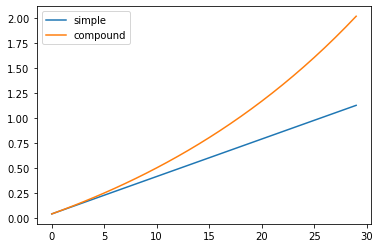

In [32]:
plt.plot(simple, label="simple")
plt.plot(compound, label="compound")
plt.legend()
plt.show()

# 자본예산(Capital Budgeting) 투자안평가 : NPV vs. IRR
* <b>순현재가치(Net Present Value, NPV)</b>
    * 미래에 발생할 일련의 현금흐름을 현재가치로 계산한 것
    * $NPV = SUM( 현금흐름/(1+할인율)**기간 )$
<p>    
* <b>내부수익률(Internal Rate of Return, IRR)</b>
    * 사업기간 동안의 현금흐름을 현재가치로 계산한 값이 투자지출과 같아지도록 할인하는 이자율
    * NPV가 0인 경우의 할인율
    * <b>투자할 돈대비 나중에 벌어들일 수익을 고려했을때 어느정도의 할인율이 나와야 본전이 되는지</b>
    * 수익률을 정기적으로 유효하게 측정할 수 없는 대체투자(부동산이나 인프라 자산에 대한 투자)에 많이 이용
    * $IRR = SUM( 현금흐름/(1+할인율)**기간 - 초기투자금 ) = 0$

In [70]:
# ! pip install numpy_financial

## NPV

* NVP > 0 인 경우 투자

In [66]:
현금흐름 = [12000,15000,18000,21000,26000]
할인율 = 0.015

초기투자비용 = -70000 #초기투자금
NPV = 초기투자비용
for 기간, 현금흐름 in enumerate(현금유입):
    p = 현금흐름 / ((1+0.015)**(기간+1))
    NPV = NPV + p
    print(p)
print(f"5년후:{NPV}, 초기투자금: -70000")
# NPV

11822.660098522168
14559.926229707107
17213.705887338452
19785.86883602121
24134.768460546635
5년후:17516.929512135568, 초기투자금: -70000


In [77]:
import numpy_financial as npf
cf = [-70000,12000,15000,18000,21000,26000]
NPV = npf.npv(할인율, cf)
print(NPV)

17516.929512135568


## IRR

* IRR > 기업의 자본비용(시장이자율)일 경우 채택

In [80]:
def irr(cashflow, period = 'year'):
    ## 기준 기간이 년, 월인지 확인, 기본값은 year
    if period == 'month': ## 월로 설정할 경우, 12개월 기준
        period = 12
    elif period == 'year': 
        period = 1
  
    ## Discount Rate 별 NPV 값 구하기
    total_npv = 0
    irr_npv = []
    discount_rates = np.arange(0,1,0.0001)
    for irr in discount_rates:
        irr_npv.append(total_npv)
        total_npv = 0    
        for i in range(len(cashflow)):
            each_year_npv = cashflow[i]/(1+irr)**(i/period)
            total_npv += each_year_npv
  
    ## IRR 지점 값 찾기 / NPV가 '음->양' 혹은 '양->음'으로 바뀌는 구간 기록
    irr_point = [i for i in range(len(irr_npv[1:])) if irr_npv[i] * irr_npv[i+1] < 0 or irr_npv[1:][i] == 0]

    ## 그래프 출력
    plt.figure(figsize = (10, 4))
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['axes.grid'] = True 
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
    plt.axvline(x=0, color='k', linestyle='--', linewidth=2)
    plt.plot(discount_rates[1:], irr_npv[1:],color='green')
    plt.xlabel('Discount Rate')
    plt.ylabel('NPV')

    ## IRR이 존재할 경우
    if irr_point:
        for i in range(len(irr_point)):
            point = round(irr_point[i] * 0.0001, 4)
            print(i+1,'번째 IRR 지점 :', point)
            plt.text(point, -1, 'irr  :  {}'.format(point), fontsize = 13)
            plt.axvline(x=point, color='r', linestyle='--', linewidth=2) 
        return list(map(lambda x : round(x, 4),list(map(lambda x:x * 0.0001,irr_point))))
    else:
        print('IRR 지점(NPV가 0이 되는 지점)이 없습니다. 그래프를 확인해 주세요.')


1 번째 IRR 지점 : 0.0867


[0.0867]

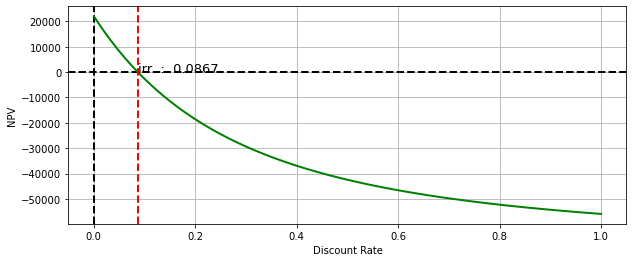

In [81]:
cf = [-70000,12000,15000,18000,21000,26000]
irr(cf)

1 번째 IRR 지점 : 0.115
2 번째 IRR 지점 : 0.4351


[0.115, 0.4351]

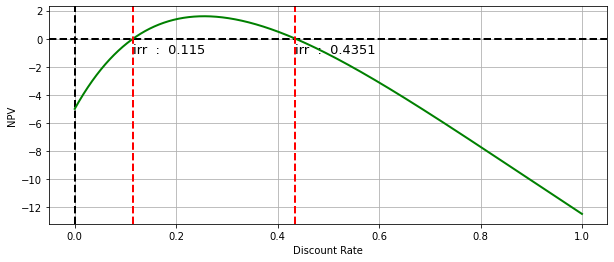

In [82]:
cf = [-100, 255, -160]
irr(cf)

In [74]:
import numpy_financial as npf
cf = [-70000,12000,15000,18000,21000,26000]
IRR = npf.irr(cf)
print(IRR)

0.08663094803653171


* Discount Rate이 11%와 43% 사이에 있어야 양의 현금흐름을 얻을 수 있는 것이죠. 

 

## 지배원리(dominance principle)

* 평균-분산 기준(mean-variance criterion)  : 두 포트폴리오 수익률의 표준편차가 동일하다면 기대수익률이 상대적으로 큰 포트폴리오를 선택

# 자산배분
* 효율적 포트폴리오를 찾아내는 과정
* 정기적 리밸런싱
* 효율적 포트폴리오(efficient frontier)

## 포트폴리오 성과 측정 지표</b>
* <b>위험조정성과지표(단위 위험당 초과성과를 나타내는 지표)</b>
    * <b>샤프지수 </b>
        * 위험 한 단위를 감수할 때 얻을 수 있는 초과수익의 정도를 측정하는 성과지표
    * <b>트레이너지수 </b>
        * 위험 한 단위당 초과성과(무위험수익률)가 얼마인지를 측정하는 성과지표
        * 샤프(분모:총위험척도인 표준편차) , 트레이너지수(분모:시장위험척도인 베타값)
    * <b>정보비율 </b>
        * 포트폴리오와 벤치마크 수익률 간 변동성 대비 얼마만큼의 초과수익률이 발생하는지 측정하는 성과지표
        * 단순히 수익률만 보는 것이 아니라 그 수익률을 올리기 위해 부담한 리스크까지 고려
        * ① 벤치마크 수익률과 포트폴리오 수익률 간의 '차이'를 이용하는 방법
            * ( 포트폴리오수익률-벤치마크수익률) / 표준편차
        * ② 벤치마크 수익률과 포트폴리오 수익률 간의 '회귀분석'을 이용하는 방법
            * 젠센알파지수 /  잔차의표준편차
* <b>위험조정수익률</b>
    * <b>젠센알파 : 포트폴리오 수익률 - 기대수익률(벤치마크수익률==시장수익률)</b>
    * <b>최대 낙폭(MDD, Maximum Drawdown)</b>
        * 특정 투자 기간 중 포트폴리오의 고점에서 저점까지 최대 누적 손실
        * 예) 자산 A: 100, 120, 130, 100, 65, 80, 100, 120, 140, 160<br>
          100으로 시작한 자산의 가치는 한때 130까지 올랐다가 그 절반인 65로 떨어졌다면 MDD는 50%   
        * 예) 자산 B: 100, 80, 75, 90, 140, 180, 220, 160, 190
          220에서 정점에 이른 후 160까지 떨어졌다면 MDD는 (220-160) / 160 = 27%   
        

## 포트폴리오 비주얼라이저(Portfolio Visualizer)
* ref : https://www.portfoliovisualizer.com/backtest-asset-class-allocation
* ref : https://www.portfoliovisualizer.com/

<a href="https://www.portfoliovisualizer.com/backtest-asset-class-allocation?s=y&mode=1&timePeriod=4&startYear=2018&firstMonth=1&endYear=2022&lastMonth=12&calendarAligned=true&includeYTD=false&initialAmount=10000&annualOperation=1&annualAdjustment=0&inflationAdjusted=true&annualPercentage=0.0&frequency=4&rebalanceType=1&absoluteDeviation=5.0&relativeDeviation=25.0&leverageType=0&leverageRatio=0.0&debtAmount=0&debtInterest=0.0&maintenanceMargin=25.0&leveragedBenchmark=false&benchmark=VFINX&portfolioNames=false&portfolioName1=Portfolio+1&portfolioName2=Portfolio+2&portfolioName3=Portfolio+3&asset1=TotalStockMarket&allocation1_1=50&asset2=GlobalBondHedged&allocation2_1=50">자산비교</a>

* 백테스팅 결과
    * Portfolio Return : 기간별 누적수익률
    * Metrics : 기술통계 및 위험조정지표
    * Annual Returns : 투자 기간별, 자산 클래스별 수익률
    * Drawdowns : 최대손실폭
    * Assets : 자산 간 상관관계(수익률, 위험)

# 평균-분산 포트폴리오 이론

## 포트폴리오의 기대수익률과 위험
    * 분산 투자의 효과
    * 투자기회집합은 상관관계가 낮은 주식끼리 결합할수록 극대화된다
    * 두 자산 간 상관계수가 1보다 작을 때 투자기회집합선은 왼쪽으로 휜다
    * 투자기회집합(E(r):포트폴리오의 기대수익률, σ:수익률의 분산, ρ:상관계수

<img src="https://thebook.io/img/080227/099.jpg" width = "200">

* 경기 국면별 주식 A, B의 수익률

<pre>
국면  확률   자산A   자산B
-----------------------------------
호황   1/3    7%      13%
횡보   1/3    4%      4%
불황   1/3    1%     -5%

 * 자산A E(r) = 1/3 × 7% + 1/3 × 4% + 1/3 × 1% = 4%
 * 자산B E(r) = 1/3 × 13% + 1/3 × 4% + 1/3 × -5% = 4%

 * 자산A 분산 = 1/3 × (7% - 4%)2 + 1/3 × (4% - 4%)2 + 1/3 × (1% - 4%)2 = 0.0006
 * 자산B 분산 = 1/3 × (13% - 4%)2 + 1/3 × (4% - 4%)2 + 1/3 × (-5% - 4%)2 = 0.0054
 
 * 포트폴리오 기대수익률 = (자산A투자비중 × 자산A기대수익률) + (자산B투자비중 × 자산B기대수익률)
                       = (50% × 4%) + (50% × 4%) = 4%


In [102]:
A자산_기대수익률 = [ 0.07, 0.04, 0.01 ]
B자산_기대수익률 = [ 0.13, 0.04, -0.05 ]
경기국면별확률 = [ 1/3, 1/3, 1/3 ]

A자산_기댓값 = sum( s*p for s, p in zip(A자산_기대수익률, 경기국면별확률) )
B자산_기댓값 = sum( s*p for s, p in zip(B자산_기대수익률, 경기국면별확률) )
print(f"A자산_기댓값 : {A자산_기댓값:.2f}%")
print(f"B자산_기댓값 : {B자산_기댓값:.2f}%")

포트폴리오_기대수익률 = (0.3*A자산_기댓값) + (0.7*B자산_기댓값)
print(f"포트폴리오_기대수익률 : {포트폴리오_기대수익률:.2f}%")

A자산_기댓값 : 0.04%
B자산_기댓값 : 0.04%
포트폴리오_기대수익률 : 0.04%


## 최소분산포트폴리오
## 체계적 위험과 비체계적 위험

* <b>체계적 위험(systematic risk) == 시장위험(market risk) == <font color=red>베타</font></b>
    * 시장 전체와 관련된 위험
    * 예) 이자율, 환율, 경기선행지수 등
* <b>비체계적 위험(unsystematic risk)</b>
    * 개별 주식과 관련된 고유의 위험
    * 분산 투자로 제거할 수 있는 위험
    * 예) 어닝쇼크, 실적 부진

## 무위험자산(risk-free asset)과 최적 자산배분
* 이자율, 인플레이션 변화에도 영향을 받지 않아 미래의 현금흐름에 불확실성이 없는 자산
* 예) 만기가 짧아 인플레이션, 이자율의 영향을 적게 받는 정부발행채권 등
* <b>최적 포트폴리오는 효율적 투자선과 투자자의 무차별곡선이 접하는 점(P와 Q)에서 결정</b>
*  무위험자산이 존재하는 경우 자본배분선이 효율적 투자선 상의 가장 우월한 포트폴리오

<table><tr><td>
<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDA1MTZfMjMz/MDAxNTg5NjMwMzg4ODgw.vSrwnCmAQFVGh6GbEw--Hserzk5VVsFu0Rm9E8hZ-oEg.ECtTVPoTH4eZuiX3sja0Zun6216j698vuElo_dX-QUcg.PNG.eun9805/image.png?type=w800" width=500></td>
<td><img src="https://mblogthumb-phinf.pstatic.net/MjAyMDA1MTZfMjQx/MDAxNTg5NjMwNzI2OTMy.ch2J5mQexmJzt9y9o63rPF8Em24TdrB5jrSQzdd1BF4g.J3aaD5G-OJTKVnQ7IaWJzusA0454inCAxRe9-zNVp4Qg.PNG.eun9805/image.png?type=w800" width=500></td></tr></table>

<img src="https://thebook.io/img/080227/129.jpg">

## 최적 포트폴리오를 선택

* 1단계: 지배원리에 따라 전체투자기회집합에서 효율적 투자선을 찾아낸다.
* 2단계: 투자자의 기대효율을 극대화하고자 투자자의 위험회피 성향을 보여주는 무차별곡선과 효율적 투자선이 접하는 최적 포트폴리오를 찾아낸다.
    * 무차별곡선 : 경제주체가 동일한 효용을 제공하는 재화들의 조합을 연결한 곡선

# 자본자산가격결정모델(Capital Asset Pricing Model, CAPM)

* <b>위험과 기대수익률 간의 균형 관계를 보여주는 가격결정이론 </b>
* 전체 시장이 균형 상태(수요공급일치하는 가격이 형성된 상태)에서 자산의 균형가격이 위험을 반영해 어떻게 결정되는지를 밝히는 모델
* 자산의 리스크에 따라 기대수익률이 결정(수익률이 리스크에 비례, HRHR)

## 포트폴리오 베타

* <font color=red><b>포트폴리오 베타 </b></font>
    * <b>시장 변동과 관련해 포트폴리오의 가격 변동성을 상대적으로 나타내주는 지표</b>
        * 시장수익률(벤치마크 수익률)이 1%p 변할 때 종목 수익률이 몇 %p 변하는가?   
    * 시장에 대한 개별 자산 또는 포트폴리오 민감도를 의미     
    * 기술주의 베타는 일반적으로 1.0 이상(시장보다 높은 변동성을 가진다)
        * 예) 삼성전자 52주베타 : 1.38 
        * https://finance.naver.com/item/coinfo.naver?code=005930
        * 예) 한국전력 52주베타 : 0.15 
        * https://finance.naver.com/item/coinfo.naver?code=015760

<pre>
종목       52주베타   투자금액
---------------------------------------
삼성전자    1.38      5억원
한국전력    0.47      2억원
현대차      1.02      3억원

포트폴리오 베타 = (1.38*5/10) + (0.47*2/10) + (1.02*3/10) = 1.09

<b>[Quiz] 무위험이자율(채권수익률) 4%, 시장포트폴리오 기대수익률 10%, 베타 1.09인 포트폴리오의 기대수익률은?
       포트폴리오 기대수익률 = 4% + (10%-4%)×1.09 = 10.54%</b>

In [106]:
import numpy as np
beta52 = [ 1.38, 0.47, 1.02 ]
investment = [ 5, 2, 3 ]
weights = [ w/10 for w in investment ]
beta = np.dot( beta52, weights )
print( 'The portfolio beta is {0:0.2f}'.format( beta ) )

The portfolio beta is 1.09


# 블랙-리터만 모델

* <b>마코위츠 : 평균-분산 모델</b>
    * 수익률과 변동성을 토대로 비중을 계산
    * 과거 자료만 갖고 기대수익률과 변동성을 다루고 있으므로 투자 대상의 미래가치를 장담하지 못한다. 
    * 다수 자산에 투자 비중이 배분되지 않고 일부 자산에 과도한 비중으로 투자되는 경우가 발생한다.<br><br>     
* <b>샤프 : 자본자산가격결정모델(CAPM)</b> 
    * 수익률과 변동성에 무위험자산 추가  <br><br>      
* <b>블랙-리터만 : 블랙리터만 모델 </b> 
    * 변동성과 비중을 통해 기대수익률을 계산 
    * 평균 분산 모델의 한계점 보완 모델
    * '베이즈 정리'를 바탕으로 투자자산군에 대한 투자자 기대를 반영해 이러한 문제들을 효과적으로 제거
        * [step1]내재균형수익률을 계산 : 자산 각각의 시가총액 비중
        * [step2]사전분포(prior distribution) 설정 : 기대수익률에 대한 분석 또는 전망 이용
        * [step3]사후분포(posterior distribution) 설정 : 내재균형수익률과 사전분포(투자자의 분석) 이용
        * ref : https://www.portfoliovisualizer.com/black-litterman-model

1. 시장 비중, 과거 종가 데이터, 무위험이자율 등과 같은 필요한 데이터 수집
2. 위험회피계수(λ)
3. 위험조정상수(τ)
4. 균형기대수익률(π)
5. 시장 전망 반영과 결합
6. 결합전망기대수익률(E(r)
7. 최적 투자 비중<br>
<img src="https://thebook.io/img/080227/171.jpg" width=400>

<table width=500>
<tbody>
<tr>
<td class="w20">
<p class="txts dm">모델</p>
</td>
<td class="w40">
    <p class="txts dm"><font color=red><b>평균-분산 모델</b></font></p>
</td>
<td class="w40">
<p class="txts dm"><font color=red><b>블랙-리터만 모델</b></font></p>
</td>
</tr>
<tr>
<td class="w20">
<p class="txts dm">개요</p>
</td>
<td class="w40">
<p class="txts dl">자산 간 수익률, 분산, 상관계수를 고려해 위험 대비 수익률이 최대가 되도록 배분</p>
</td>
<td class="w40">
<p class="txts dl">시장포트폴리오를 효율적 배분으로 가정하고, 투자자 전망을 추가하는 방식</p>
</td>
</tr>
<tr>
<td class="w20">
<p class="txts dm">수익률</p>
</td>
<td class="w40">
<p class="txts dl">과거 자산군별 장기평균수익률을 사용</p>
</td>
<td class="w40">
<p class="txts dl">내재수익률(역최적화 이용)+투자자 전망</p>
</td>
</tr>
<tr>
<td class="w20">
<p class="txts dm">표준 편차</p>
</td>
<td class="w40">
<p class="txts dl">과거 자산군별 장기표준편차를 사용</p>
</td>
<td class="w40">
<p class="txts dl">자산군별 수익률표준편차+전망 불확실성</p>
</td>
</tr>
<tr>
<td class="w20">
<p class="txts dm">목적 함수</p>
</td>
<td class="w40">
<p class="txts dl">위험조정수익률 최대화</p>
</td>
<td class="w40">
<p class="txts dl">기대수익률로 최적화하거나, 제한조건에 따라 위험조정수익률을 최대화함</p>
</td>
</tr>
<tr>
<td class="w20">
<p class="txts dm">장점</p>
</td>
<td class="w40">
<p class="txts dl">자산 분석에 활용</p>
</td>
<td class="w40">
<p class="txts dl">자산별로 기대수익률에 투자자 전망 반영</p>
</td>
</tr>
<tr>
<td class="w20">
<p class="txts dm">단점</p>
</td>
<td class="w40">
<p class="txts dl">극단적 배분 문제(코너해)</p>
</td>
<td class="w40">
<p class="txts dl">성과가 투자 전망에 좌우되며, 일부 자산의 시장 비중을 구하기 어려움</p>
</td>
</tr>
</tbody>
</table>

# 파마-프렌치(Fama-French) 3팩터 모델
* 베타는 죽었다 : <font color=red><b>베타로 측정한 주식의 위험은 수익률을 예측할 수 없다</b></font>
* 효율적 시장 이론
    * 시장은 효율적이므로 이미 투자자들은 모든 정보를 알고 있으며 가격에 반영돼 있다는 이론
    * CAPM 모델에서 자산수익률에 영향을 주는 유일한 요인은 시장수익률 <br><br>
* <font color=red><b>다변량 모델을 제안</b></font>
    *  CAPM을 기반 +  복수의 리스크 고려
    * 시장 리스크, 가치 리스크, 규모 리스크
    * 시장, BE/ME(= 주가순자산비율(PBR)의 역수), 시가총액<br><br>
* 시장의 평균적 위험프리미엄
    * <b>SMB(Small Minus Big)</b>
        * 규모(Size) 팩터,  시장가치의 크기 == 소형주 포트폴리오와 대형주 포트폴리오의 수익률 차이
    * <b>HML(High Minus Low)</b> 
        * 가치(Valu) 팩터, 장부가치와 시장가치 사이의 비율(BE/ME)
        * BE/ME(PBR의 역수)가 높은(High-book-to-market-equity) 포트폴리오 수익률에서 BE/ME가 낮은(Low-book-to-market-equity) 포트폴리오 수익률을 차감한 값<br><br>
* <b>포트폴리오 구성 절차</b>
    * [step1] SMB : 기업의 시가총액 기준으로 상위 50%와 하위 50%에 속하는 기업들로 두 개의 포트폴리오(Big, Small)를 구성
    * [step2] HML : 장부가/시장가 비율 기준으로 상위 30%, 중위 40%, 하위 30%에 속하는 기업들로 세 개의 포트폴리오(Value, Neutral, Growth)를 구성
    * [step3] 서로 교차해 여섯 개의 기업 규모-장부가/시장가(BV, BN, BG, SV, SN, SG) 구성
        * SMB =  1/3(SV + SN + SG) - 1/3(BV + BN + BG)
        * HML =  1/2(SV + BV) - 1/2(SG + BG)            

* <b>자본자산가격결정 모델 (CAPM, Capital Asset Pricing Model)</b> 
    *  전체 시장의 변동성 대비 개별 자산의 민감도
    * RE = rf + β(rm – rf)
    * $R_i= \alpha_i + Rf + \beta_i(Rm-Rf)$
        * RE = cost of equity capital               
        * rf = risk free rate
        * β = beta coefficient              
        * Rm = expected market return       
        * (rm – rf) = market premium rate
<p>
* <b>자본자산가격결정 모델 (FF, Fama–French 3 Factor)</b> 
    * CAPM을 기반으로 한 모델로 <b>[시장(MKT), 가치(HML), 규모(SMB)] 리스크</b> 고려
        *  시장, BE/ME(=주가순자산비율(PBR)의 역수),시가총액 
        * $RE = rf + β1MKT(rm – rf) + β2(SMB) + β3(HML)$
            * SMB= small market capitalisation minus big  → Size Factor  
            * HML= high book to price ratio minus low     → Value Factor  
    * <font color=red>시가총액이 작고 PBR이 낮은 종목(가치주, 1 이하)일수록 초과수익을 올리기에 유리</font>
<p>    
* <b> Fama–French 5팩터 모델</b> 
    * 3팩터 + <b>기업이익(firm profitability), 투자수준(level of investment)</b> 고려

<table style="border-collapse: collapse; width: 100%; height: 152px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 19px;">
<td style="width: 11.5116%; height: 19px;">Concept</td>
<td style="width: 8.25582%; height: 19px;">Label</td>
<td style="width: 19.5349%; height: 19px;">Name</td>
<td style="width: 60.6977%; height: 19px;">Description</td>
</tr>
<tr style="height: 19px;">
<td style="width: 11.5116%; height: 19px;">기업 규모</td>
<td style="width: 8.25582%; height: 19px;">SMB</td>
<td style="width: 19.5349%; height: 19px;">Small Minus Big</td>
<td style="width: 60.6977%; height: 19px;">(average return on the 9 small stock portfolios) - (average return on the 9 big stock portfolios)</td>
</tr>
<tr style="height: 19px;">
<td style="width: 11.5116%; height: 19px;">가치</td>
<td style="width: 8.25582%; height: 19px;">HML</td>
<td style="width: 19.5349%; height: 19px;">High Minus Low</td>
<td style="width: 60.6977%; height: 19px;">(average return on the 2 value portfolios) - (average return on the 2 growth portfolios)</td>
</tr>
<tr style="height: 19px;">
<td style="width: 11.5116%; height: 19px;">영업 수익성</td>
<td style="width: 8.25582%; height: 19px;">RMW</td>
<td style="width: 19.5349%; height: 19px;">Robust Minus Weak</td>
<td style="width: 60.6977%; height: 19px;">(average return on the 2 robust operating profitability portfolios) - (average return on the 2 weak operating profitability portfolios)</td>
</tr>
<tr style="height: 38px;">
<td style="width: 11.5116%; height: 38px;">투자</td>
<td style="width: 8.25582%; height: 38px;">CMA</td>
<td style="width: 19.5349%; height: 38px;">Conservative Minus Aggressive</td>
<td style="width: 60.6977%; height: 38px;">(average return on the 2 conservative investment portfolios) - (average return on the 2 aggressive investment portfolios)</td>
</tr>
<tr style="height: 38px;">
<td style="width: 11.5116%; height: 38px;">시장</td>
<td style="width: 8.25582%; height: 38px;">Rm-Rf</td>
<td style="width: 19.5349%; height: 38px;">Excess return on the market</td>
<td style="width: 60.6977%; height: 38px;">(value-weight return of all firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ at the beginning of month t with 'good' data for t) - (the one-month Treasury bill rate)</td>
</tr>
</tbody>
</table><br>
* 기업 규모: 시가총액<br>
* 가치: 주식의 장부가치(Book value = 순자산 = 자본)을 시가총액으로 나눈 값 = 1/PBR<br>
* 영업 수익성(OP): 매출에서 비용을 뺀 금액<br>
* 투자: 투자를 얼마나 보수적/공격적으로 하는지<br>

In [26]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
len(get_available_datasets())

297

In [27]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202208 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2022 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (6 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (6 rows x 5 cols)


In [28]:
ds[4].head()

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2017-10,517,606,659,602,1041
2017-11,514,603,651,598,1031
2017-12,509,601,648,593,1021
2018-01,505,601,646,593,1016
2018-02,504,598,641,587,1011


https://thebook.io/080227/ch06/03/